# 연습문제

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential      # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense           # 모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop,SGD # 옵티마이저
from tensorflow.keras.losses import mse             # 활성화 함수
import pandas as pd 
import sys
import os



from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# 학습에 대한 콜백함수 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## 문제 (1)
### #02. 데이터 준비

In [2]:
origin = pd.read_excel('https://data.hossam.kr/F02/fish2.xlsx')
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


### #03. 데이터 전처리

In [3]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      56 non-null     float64
 1   높이      56 non-null     float64
 2   두께      56 non-null     float64
 3   무게      56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [4]:
origin.columns

Index(['길이', '높이', '두께', '무게'], dtype='object')

#### 연속형 변수의 데이터 분포 확인 

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: >

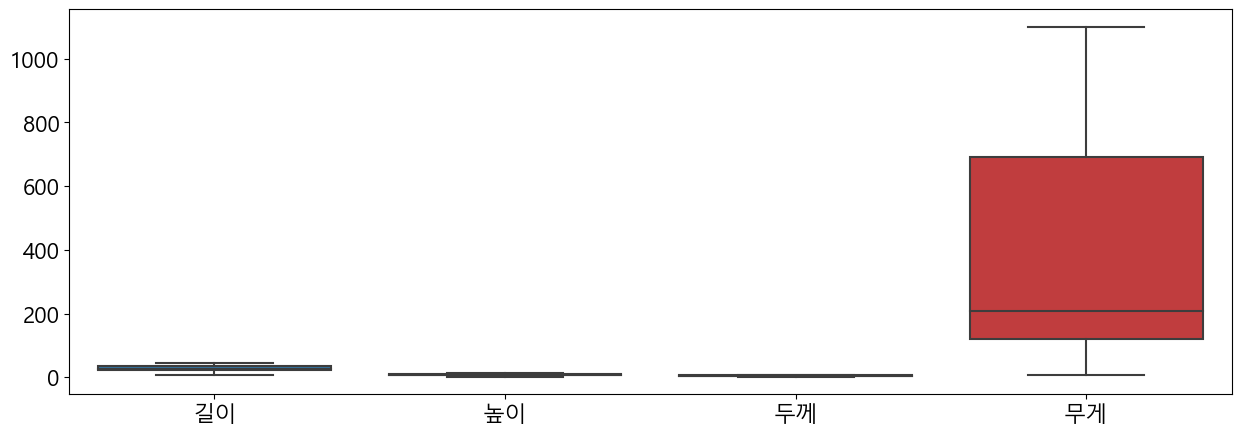

In [5]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,5))
sns.boxplot(data=origin)
    

#### 산점도 그래프와 추세선 확인

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Figure size 2000x2000 with 0 Axes>

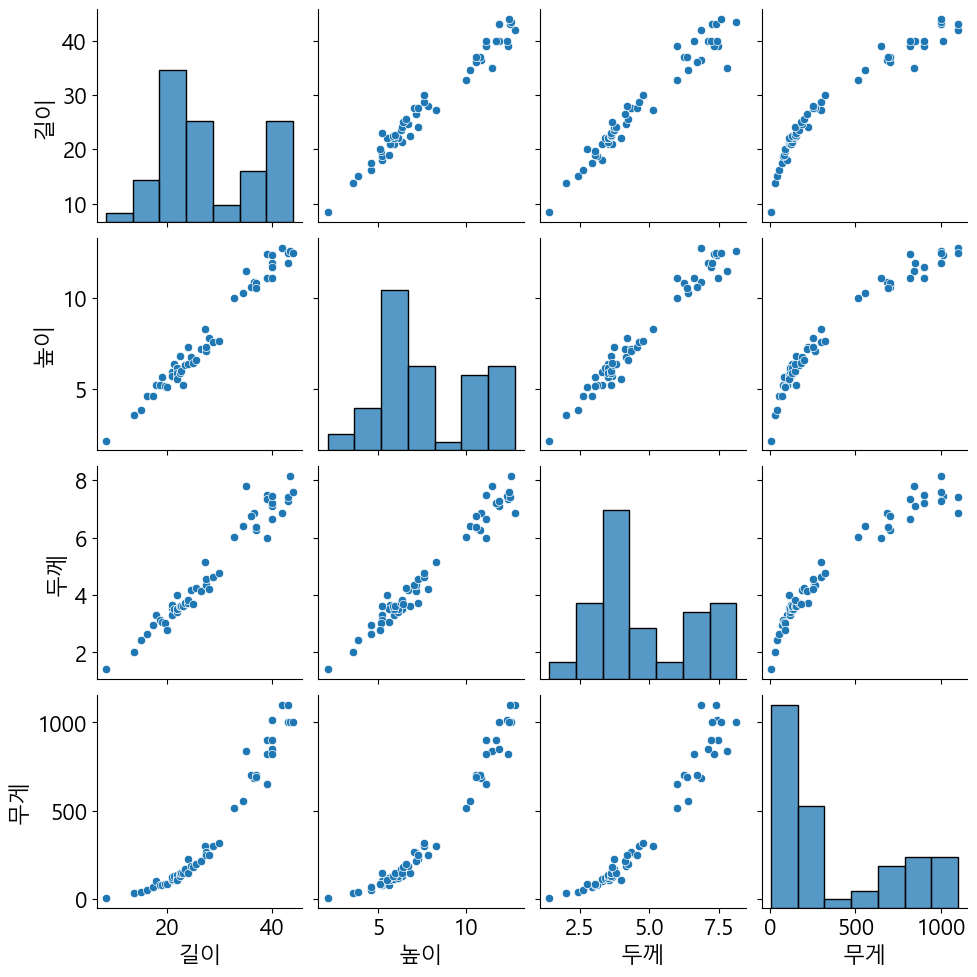

In [6]:

plt.figure(figsize=(20,20))
sns.pairplot(origin)

### #05. 데이터 분할

In [7]:
np.random.seed(3132)


#### 독립 - 종속 구분

다항회귀 모델로 구현하시오.



In [8]:
x = origin[['길이','높이','두께']]
y= origin[['무게']]
print('독립변수 : ',x.shape,'종속변수 : ',y.shape)

독립변수 :  (56, 3) 종속변수 :  (56, 1)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=777)
print(len(y_train),len(x_test))


39 17


In [10]:
x_scaler = StandardScaler()

x_scale = x_scaler.fit_transform(x)


x_scale.shape

(56, 3)

In [11]:
### 표준화 전 후 상자그림 비교 
x_scale_df = pd.DataFrame(x_scale,columns=['길이','높이','두께'])

tmp = pd.merge(x_scale_df,x_train,left_index= True,right_index=True)
tmp.head()

,길이_x,높이_x,두께_x,길이_y,높이_y,두께_y
0,-2.180225,-2.016507,-1.896175,8.4,2.11,1.41
1,-1.587434,-1.518703,-1.560774,13.7,3.53,2.00
2,-1.442032,-1.417039,-1.316328,15.0,3.82,2.43
4,-1.173599,-1.147103,-1.026405,17.4,4.59,2.94
5,-1.106490,-0.926246,-0.810384,18.0,5.22,3.32


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: >

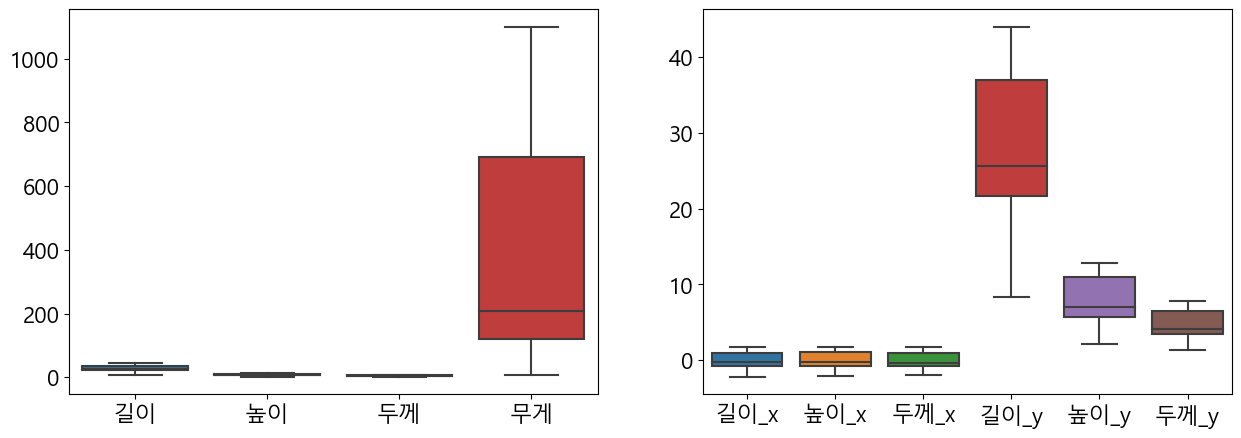

In [12]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=origin,ax=ax[0])
sns.boxplot(data=tmp,ax=ax[1])

### #07. 다항식

In [13]:
poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_train)
x_train = pd.DataFrame(x_train,columns=poly.get_feature_names_out())
x_test = poly.fit_transform(x_test)
x_test = pd.DataFrame(x_test,columns=poly.get_feature_names_out())
x_test.head()


,1,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,1.0,22.0,6.11,3.52,484.00,134.420,77.440,37.3321,21.5072,12.3904
1,1.0,21.0,5.69,3.67,441.00,119.490,77.070,32.3761,20.8823,13.4689
2,1.0,22.7,5.95,3.63,515.29,135.065,82.401,35.4025,21.5985,13.1769
3,1.0,27.5,7.28,4.57,756.25,200.200,125.675,52.9984,33.2696,20.8849
4,1.0,30.0,7.62,4.77,900.00,228.600,143.100,58.0644,36.3474,22.7529


### #07. 모델개발

In [14]:
len(x_train.columns)

10

In [15]:
model = Sequential()
model.add(Dense(30,activation = 'relu',input_shape=(len(x_train.columns),)))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics = ['mae'])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000017FB7557B20>>

In [16]:
result= model.fit(x_train,y_train, epochs=500,validation_data = (x_test,y_test),callbacks=[
    EarlyStopping(monitor='val_loss',patience=10,verbose=1),
    ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.5,min_lir=0.0001,verbose=1),
    ])



result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs',inplace=True)
result_df

Epoch 1/500


2/2 [==============================] - 1s 121ms/step - loss: 47657.7109 - mae: 140.8316 - val_loss: 21209.7520 - val_mae: 96.6293 - lr: 0.0010
Epoch 2/500
2/2 [==============================] - 0s 22ms/step - loss: 36783.3359 - mae: 129.0866 - val_loss: 15440.1289 - val_mae: 91.5097 - lr: 0.0010
Epoch 3/500
2/2 [==============================] - 0s 17ms/step - loss: 28619.2305 - mae: 121.6127 - val_loss: 11491.7109 - val_mae: 88.9522 - lr: 0.0010
Epoch 4/500
2/2 [==============================] - 0s 24ms/step - loss: 21035.8652 - mae: 112.0072 - val_loss: 9276.4756 - val_mae: 88.3769 - lr: 0.0010
Epoch 5/500
2/2 [==============================] - 0s 23ms/step - loss: 16759.5410 - mae: 107.2382 - val_loss: 8638.6641 - val_mae: 90.8600 - lr: 0.0010
Epoch 6/500
2/2 [==============================] - 0s 20ms/step - loss: 13513.0029 - mae: 100.9631 - val_loss: 9377.5752 - val_mae: 93.1274 - lr: 0.0010
Epoch 7/500
2/2 [==============================] - 0s 21ms/step - loss: 12179.1787 - mae: 

,loss,mae,val_loss,val_mae,lr
epochs,,,,,
1,47657.710938,140.831573,21209.751953,96.629280,0.001000
2,36783.335938,129.086624,15440.128906,91.509697,0.001000
3,28619.230469,121.612732,11491.710938,88.952209,0.001000
4,21035.865234,112.007240,9276.475586,88.376854,0.001000
5,16759.541016,107.238220,8638.664062,90.860016,0.001000
6,13513.002930,100.963104,9377.575195,93.127365,0.001000
7,12179.178711,98.954185,11071.133789,96.815575,0.001000
8,11998.622070,97.914185,13125.340820,103.600037,0.001000
9,12549.761719,102.677368,13964.939453,107.413727,0.000500


### #08.학습결과 평가

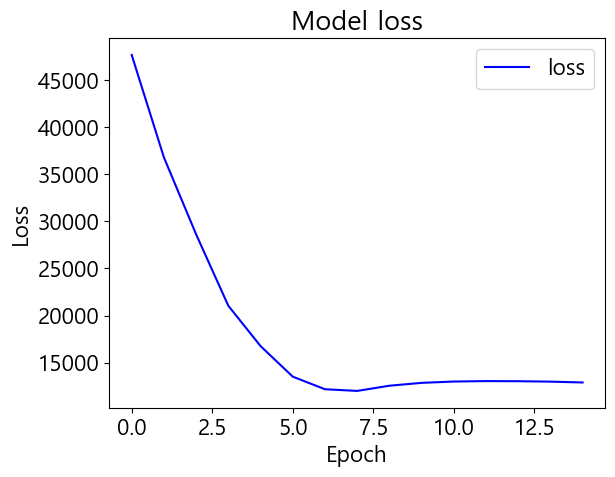

In [17]:
# 모델 손실 함수 시각화
plt.plot(result.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# # 모델 정확도 시각화
# plt.plot(result.history['mae'], 'g-', label='mae')
# plt.title('Model mae')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

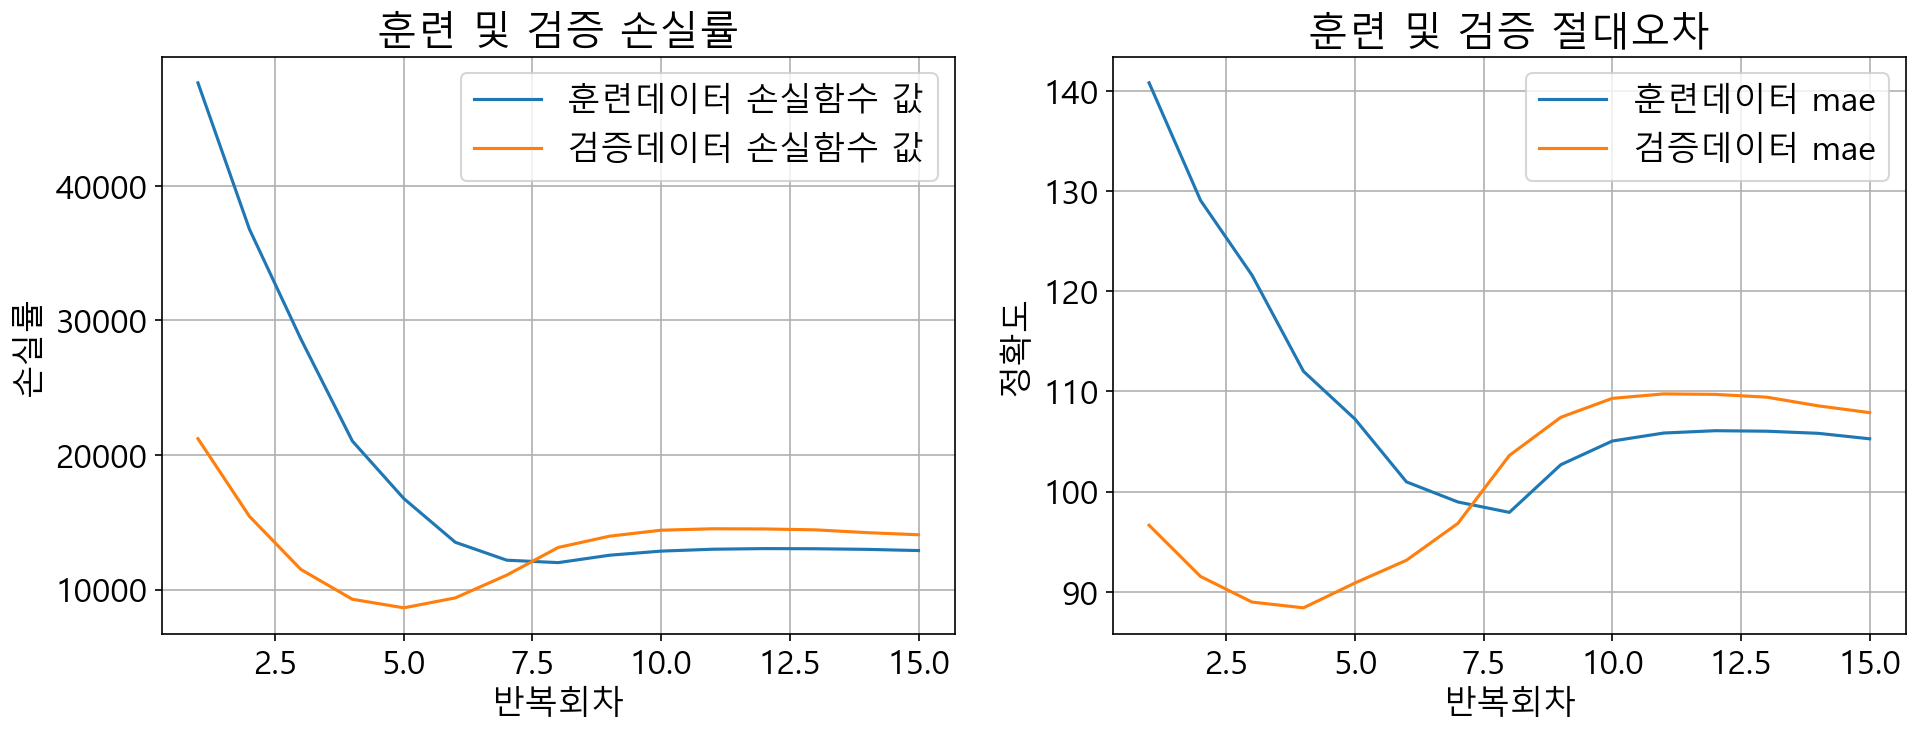

In [18]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=150)

# 1) 훈련 및 검증데이터 손실함수 시각화
sns.lineplot(x=result_df.index , y='loss',data = result_df,label = '훈련데이터 손실함수 값',ax=ax1)
sns.lineplot(x=result_df.index , y= 'val_loss',data=result_df,label = '검증데이터 손실함수 값',ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()
# 2) 훈련 및 검증 절대오차 그리기
sns.lineplot(x=result_df.index,y='mae',data=result_df,label='훈련데이터 mae',ax=ax2)
sns.lineplot(x=result_df.index,y='val_mae',data=result_df,label='검증데이터 mae',ax=ax2)

ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [19]:
evaluate1 = model.evaluate(x_train,y_train)

evaluate2 = model.evaluate(x_test,y_test)
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate1[0], evaluate1[1]))
print("최종 훈련 손실률: %f, 최종 훈련 절대오차: %f" % (evaluate2[0], evaluate2[1]))



1/1 [==============================] - 0s 16ms/step - loss: 14068.3457 - mae: 107.8802
최종 훈련 손실률: 12834.373047, 최종 훈련 절대오차: 104.954193
최종 훈련 손실률: 14068.345703, 최종 훈련 절대오차: 107.880219


## 문제(2) 
당뇨병 - 로지스틱 회귀분석

In [20]:
df = pd.read_excel('https://data.hossam.kr/F03/pima-indians.xlsx')

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


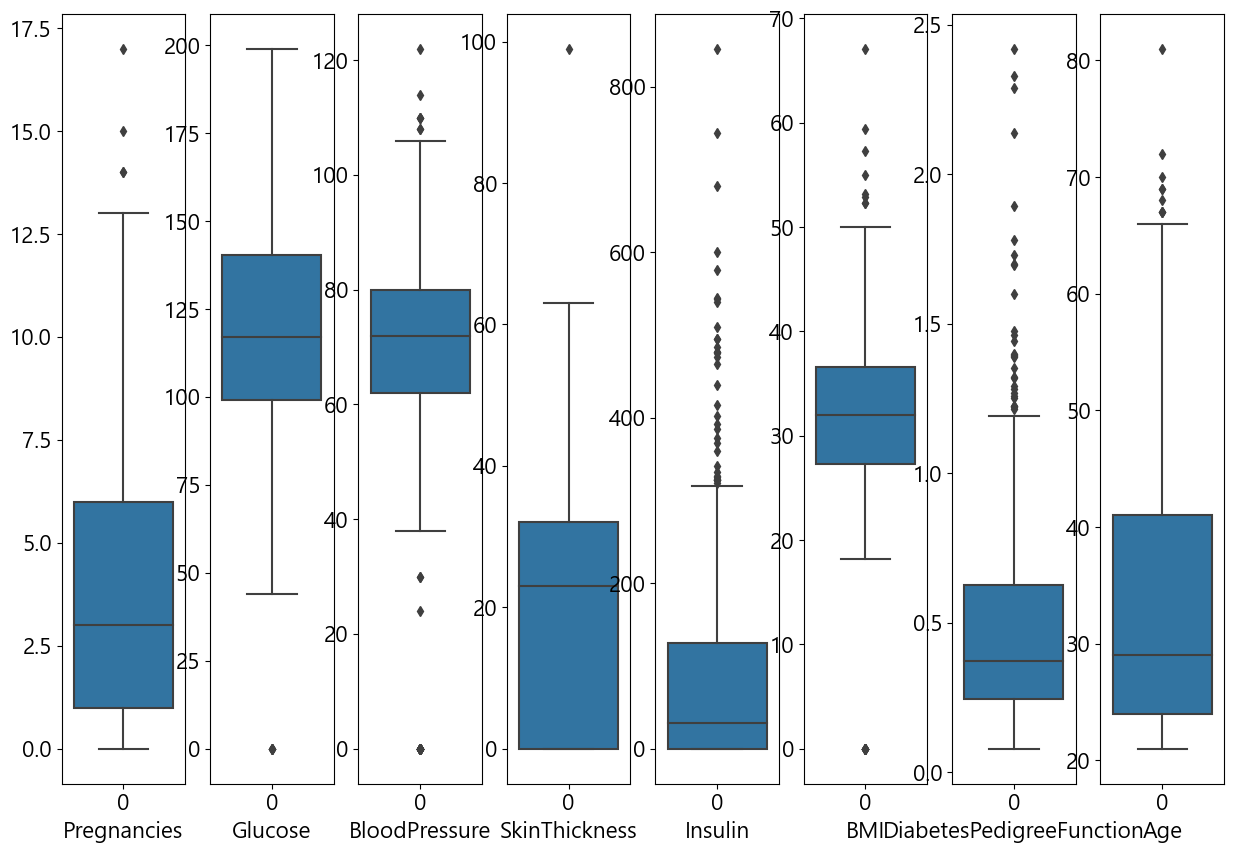

In [25]:
fig,ax = plt.subplots(1,len(df.columns)-1,figsize=(15,10))
for i,v in enumerate(df.iloc[:,:-1].columns):
    sns.boxplot(df.loc[:,v],ax=ax[i])
    ax[i].set_xlabel(v)

표준화 필요

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: >

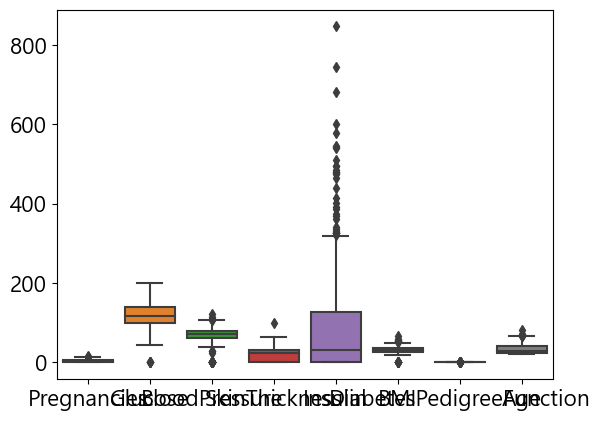

In [26]:
sns.boxplot(df.iloc[:,:-1])

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

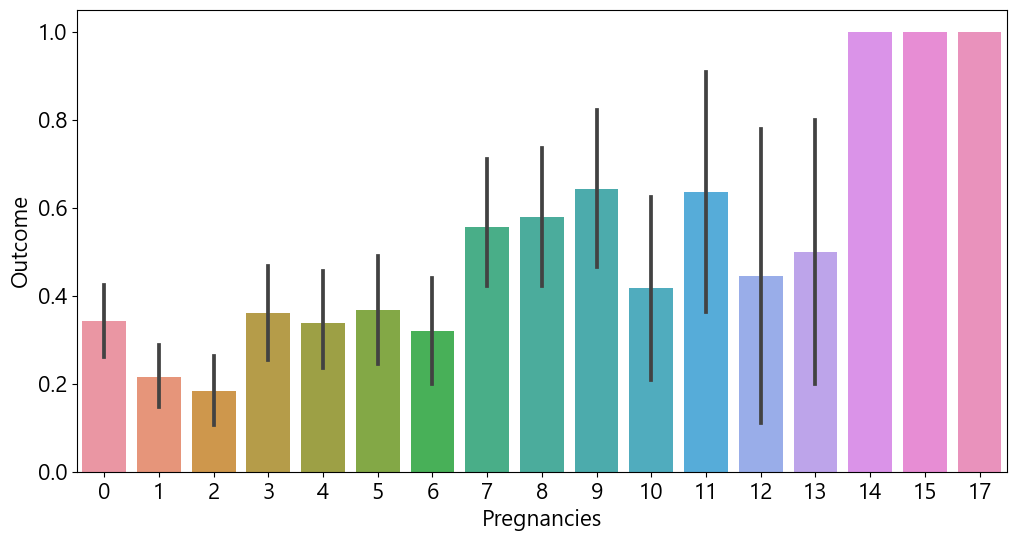

In [27]:
## 임신횟수
plt.figure(figsize=(12,6))
sns.barplot(x=df['Pregnancies'],y=df['Outcome'])

슬슬 올라감


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age', ylabel='Outcome'>

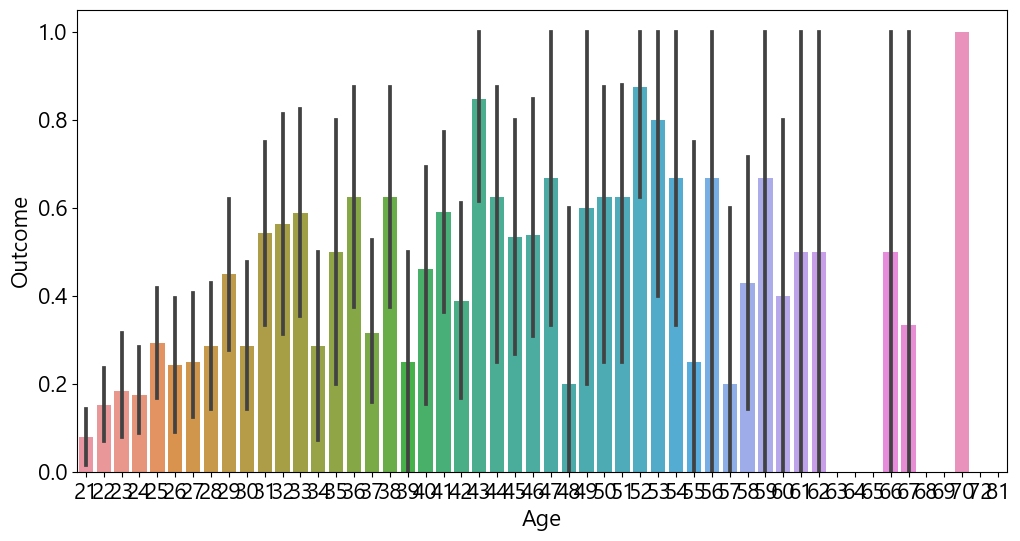

In [28]:
## age
plt.figure(figsize=(12,6))
sns.barplot(x=df['Age'],y=df['Outcome'])
## 중간쯤이 높은거같기도 

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
x = df.drop('Outcome',axis=1)
y = df[['Outcome']]


In [31]:
# def outlier_data(df,columns):
    
#     for col in df:
#         col_data = df[col]
#         Q1=df[col].quantile(0.25)
#         Q3=df[col].quantile(0.75)
#         IQR=Q3-Q1
#         low_out = Q1 - 1.5 * IQR
#         high_out = Q3 + 1.5 * IQR
#         print(len(df))
#         df = df[(df[col]>=low_out)&(df[col]<=high_out)]



In [32]:
clean_df =x.copy()
for col in x.columns[1:] :
    col_data = clean_df[col]
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3-Q1
    low_outlier = Q1 - 1.5 * IQR
    high_outlier = Q3 + 1.5 * IQR
    print(len(clean_df))
    clean_df = clean_df[(clean_df[col]>=low_outlier) & (clean_df[col]<=high_outlier)]
clean_df.info()


768
763
718
717
690
681
652
<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               645 non-null    int64  
 1   Glucose                   645 non-null    int64  
 2   BloodPressure             645 non-null    int64  
 3   SkinThickness             645 non-null    int64  
 4   Insulin                   645 non-null    int64  
 5   BMI                       645 non-null    float64
 6   DiabetesPedigreeFunction  645 non-null    float64
 7   Age                       645 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 45.4 KB


#### 표준화


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### 훈련 테스트

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=324)


In [35]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
505,1.827813,-1.436368,0.666618,-1.288212,-0.692891,0.165937,-0.630831,0.404942
293,-0.844885,0.222381,-1.091105,1.534551,0.991591,1.079756,0.426210,-0.786286
480,-0.250952,1.161295,0.046245,0.593630,2.155099,0.445159,-0.386202,0.149679
527,-0.250952,-0.153185,0.253036,-0.347291,0.218813,-0.722498,-1.101970,-0.786286
703,-0.547919,0.253678,-3.572597,-1.288212,-0.692891,0.825917,-0.507006,0.660206


### 모델 개발

In [36]:
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(8,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['binary_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
result= model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),
callbacks = [
    EarlyStopping(monitor='val_loss',patience=5,verbose=1),
    ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.5,min_lir=0.0001)
])

Epoch 1/500


17/17 [==============================] - 1s 7ms/step - loss: 0.7127 - binary_accuracy: 0.4488 - val_loss: 0.6880 - val_binary_accuracy: 0.5195 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6808 - binary_accuracy: 0.5885 - val_loss: 0.6649 - val_binary_accuracy: 0.6407 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6816 - val_loss: 0.6476 - val_binary_accuracy: 0.6623 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6419 - binary_accuracy: 0.7020 - val_loss: 0.6314 - val_binary_accuracy: 0.6667 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6271 - binary_accuracy: 0.6965 - val_loss: 0.6159 - val_binary_accuracy: 0.6797 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6127 - binary_accuracy: 0.6946 - val_loss: 0.6003 - val_binary_accuracy: 0.6840 - lr: 0.0010
Epoc

### 결과 평가

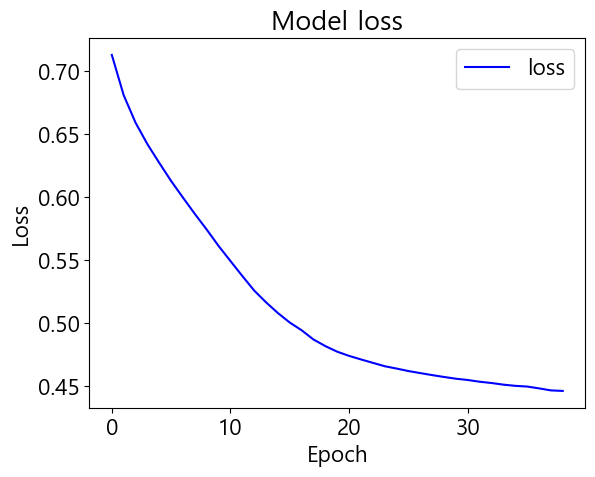

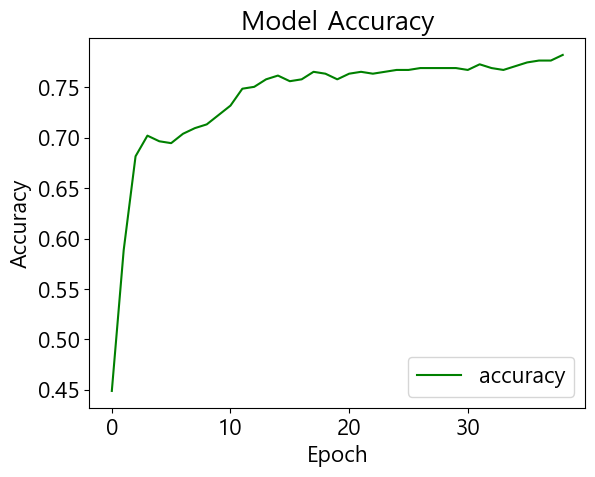

In [38]:
# 모델 손실 함수 시각화
plt.plot(result.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 정확도 시각화
plt.plot(result.history['binary_accuracy'], 'g-', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs',inplace=True)
result_df

,loss,binary_accuracy,val_loss,val_binary_accuracy,lr
epochs,,,,,
1,0.712707,0.448790,0.688044,0.519481,0.0010
2,0.680750,0.588454,0.664949,0.640693,0.0010
3,0.658969,0.681564,0.647623,0.662338,0.0010
4,0.641927,0.702048,0.631361,0.666667,0.0010
5,0.627110,0.696462,0.615919,0.679654,0.0010
6,0.612716,0.694600,0.600272,0.683983,0.0010
7,0.599523,0.703911,0.585291,0.692641,0.0010
8,0.586605,0.709497,0.570441,0.705628,0.0010
9,0.574188,0.713222,0.555627,0.709957,0.0010


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

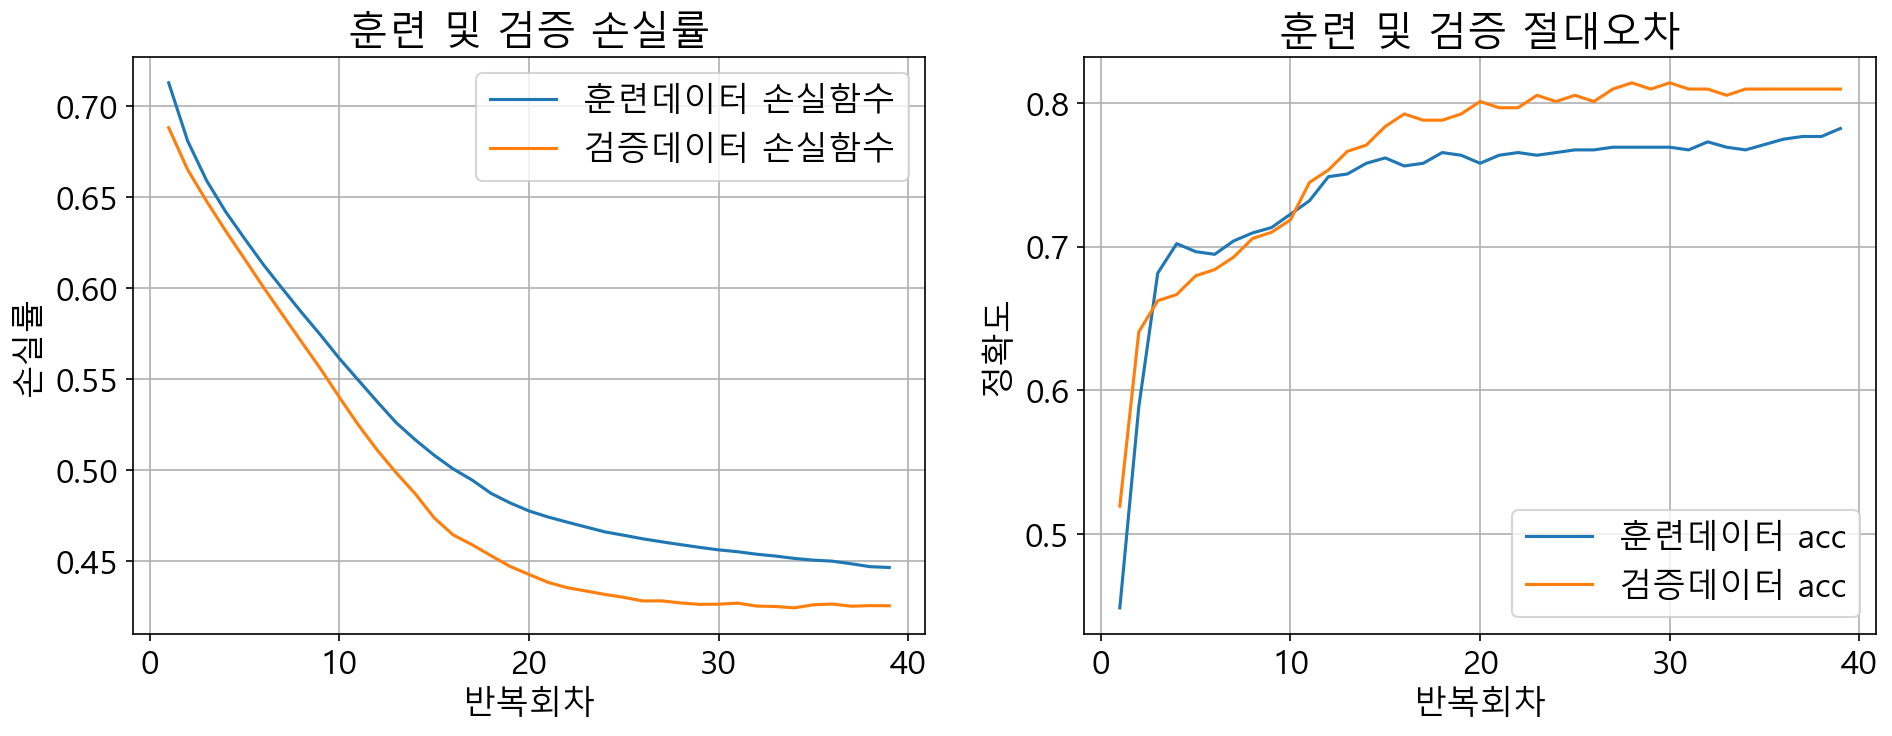

In [40]:
fig, ax = plt.subplots(1,2,figsize=(15,5),dpi = 150)

# 1) 훈련 및 검증데이터 손실함수 시각화
sns.lineplot(x=result_df.index, y='loss',data=result_df,label='훈련데이터 손실함수',ax=ax[0])
sns.lineplot(x=result_df.index,y='val_loss',data=result_df,label='검증데이터 손실함수',ax=ax[0])
ax[0].set_title('훈련 및 검증 손실률')
ax[0].set_xlabel('반복회차')
ax[0].set_ylabel('손실률')
ax[0].grid()
ax[0].legend()
# 2) 훈련 및 검증 절대오차 그리기
sns.lineplot(x=result_df.index , y='binary_accuracy',data=result_df,label='훈련데이터 acc',ax=ax[1])
sns.lineplot(x=result_df.index, y='val_binary_accuracy',data=result_df,label='검증데이터 acc',ax=ax[1])
ax[1].set_title('훈련 및 검증 절대오차')
ax[1].set_xlabel('반복회차')
ax[1].set_ylabel('정확도')
ax[1].grid()
ax[1].legend()

plt.show()
plt.close()

In [41]:
train_pred = model.predict(x_train)
train_pred

17/17 [==============================] - 0s 1ms/step


array([[0.21078418],
       [0.62538344],
       [0.6881533 ],
       [0.05341094],
       [0.69206643],
       [0.30234647],
       [0.02583677],
       [0.08256637],
       [0.05360534],
       [0.1594062 ],
       [0.6073098 ],
       [0.5469858 ],
       [0.93141764],
       [0.03810499],
       [0.2965676 ],
       [0.12851577],
       [0.7141997 ],
       [0.9011726 ],
       [0.15076558],
       [0.01959329],
       [0.8187542 ],
       [0.01673209],
       [0.3471403 ],
       [0.03952229],
       [0.37589216],
       [0.50134885],
       [0.09878522],
       [0.2317833 ],
       [0.08008549],
       [0.46819714],
       [0.22892825],
       [0.09916775],
       [0.084057  ],
       [0.27265474],
       [0.32357335],
       [0.01278518],
       [0.15120238],
       [0.4169346 ],
       [0.4241812 ],
       [0.45211402],
       [0.14161073],
       [0.11726497],
       [0.13150823],
       [0.14966713],
       [0.7198381 ],
       [0.14461063],
       [0.05686587],
       [0.123

In [42]:
rdf = pd.DataFrame({
    '결과값':y_train['Outcome'].values,
    '예측치' :np.round(train_pred.flatten()),
    '당뇨병(%)':np.round(train_pred.flatten()*100,1)
})

rdf.head()

,결과값,예측치,당뇨병(%)
0,0,0.0,21.100000
1,1,1.0,62.500000
2,1,1.0,68.800003
3,0,0.0,5.300000
4,0,1.0,69.199997


In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(rdf['결과값'],rdf['예측치'])
tn,fp,fn,tp = cm.ravel()
cmdf = pd.DataFrame([[tn,fn],[fp,tp]],index=['True','False'],columns=['Negative','Positive'])
cmdf

,Negative,Positive
True,317,79
False,38,103


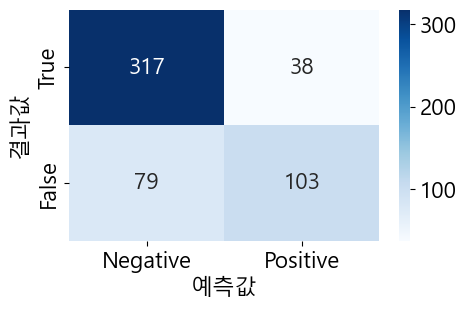

In [44]:
plt.figure(figsize=(5,3))
# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (<https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html>)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['True', 'False'])
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

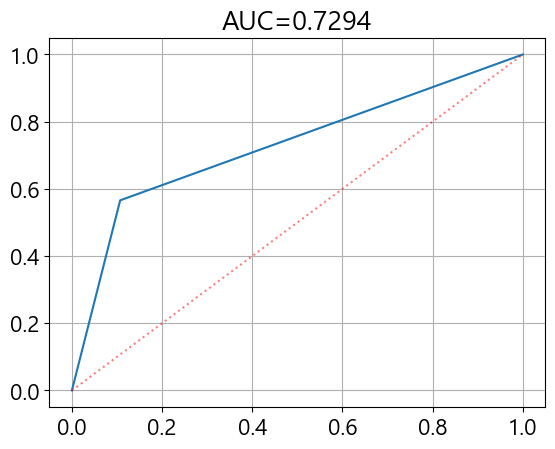

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve
ras = roc_auc_score(rdf['결과값'],rdf['예측치'])

## fpr(위양성율),tpr(재현율),threshold (임계값)

fpr,tpr,threshold = roc_curve(rdf['결과값'],rdf['예측치'])
plt.figure()
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title('AUC={:.4f}'.format(ras))
plt.grid()
plt.show()
plt.close()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
acc = accuracy_score(rdf['결과값'],rdf['예측치'])

pre = precision_score(rdf['결과값'],rdf['예측치'])

recall = recall_score(rdf['결과값'],rdf['예측치'])

f1 = f1_score(rdf['결과값'],rdf['예측치'])

fallout = fp / (fp + tn)

spe = 1- fallout

result_df = pd.DataFrame({'정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe], 'RAS': [ras], 'f1_score':[f1]})

result_df


,정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.782123,0.730496,0.565934,0.107042,0.892958,0.729446,0.637771


In [47]:
test_pred = model.predict(x_test)
test_pred

8/8 [==============================] - 0s 749us/step


array([[0.03875875],
       [0.1256964 ],
       [0.11012337],
       [0.8030172 ],
       [0.45718804],
       [0.19547693],
       [0.23038702],
       [0.05223359],
       [0.42865765],
       [0.23242536],
       [0.8458058 ],
       [0.02205998],
       [0.59155095],
       [0.5310358 ],
       [0.04696518],
       [0.15775643],
       [0.02459879],
       [0.78264135],
       [0.2411973 ],
       [0.05645083],
       [0.9066746 ],
       [0.8151926 ],
       [0.7446887 ],
       [0.07876771],
       [0.324164  ],
       [0.3243336 ],
       [0.17174397],
       [0.2274898 ],
       [0.7753513 ],
       [0.03875099],
       [0.80797356],
       [0.9224705 ],
       [0.06550083],
       [0.01872181],
       [0.04382788],
       [0.04054019],
       [0.4732809 ],
       [0.6664425 ],
       [0.6194552 ],
       [0.49298903],
       [0.01826644],
       [0.49014327],
       [0.21344173],
       [0.83512366],
       [0.15317252],
       [0.02567875],
       [0.8695014 ],
       [0.063

In [48]:
test_rdf = pd.DataFrame({
    '결과값':y_test['Outcome'].values,
    '예측치' :np.round(test_pred.flatten()),
    '당뇨병(%)':np.round(test_pred.flatten()*100,1)
})

In [49]:
cm = confusion_matrix(test_rdf['결과값'],test_rdf['예측치'])
tn,fp,fn,tp = cm.ravel()
cmdf = pd.DataFrame([[tn,fn],[fp,tp]],index=['True','False'],columns=['Negative','Positive'])
cmdf

,Negative,Positive
True,135,34
False,10,52


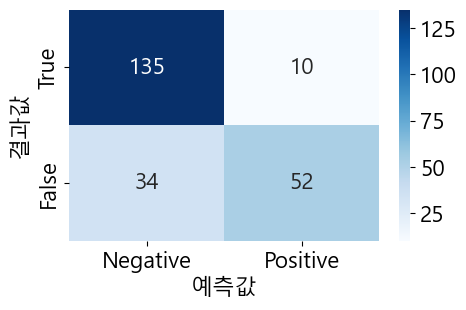

In [50]:
plt.figure(figsize=(5,3))
# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (<https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html>)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['True', 'False'])
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

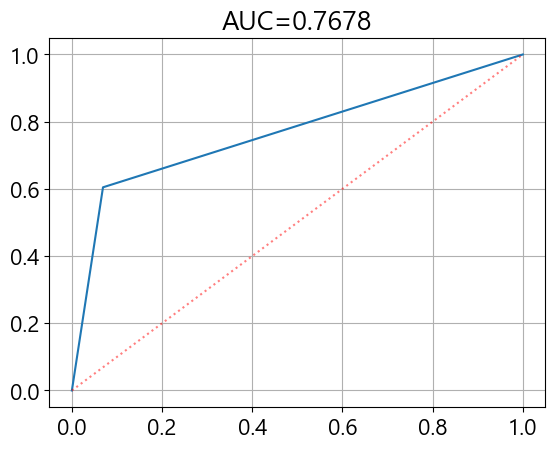

In [51]:
ras = roc_auc_score(test_rdf['결과값'],test_rdf['예측치'])

## fpr(위양성율),tpr(재현율),threshold (임계값)

fpr,tpr,threshold = roc_curve(test_rdf['결과값'],test_rdf['예측치'])
plt.figure()
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title('AUC={:.4f}'.format(ras))
plt.grid()
plt.show()
plt.close()

In [52]:
acc = accuracy_score(test_rdf['결과값'],test_rdf['예측치'])

pre = precision_score(test_rdf['결과값'],test_rdf['예측치'])

recall = recall_score(test_rdf['결과값'],test_rdf['예측치'])

f1 = f1_score(test_rdf['결과값'],test_rdf['예측치'])

fallout = fp / (fp + tn)

spe = 1- fallout

result_df = pd.DataFrame({'정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe], 'RAS': [ras], 'f1_score':[f1]})

result_df

,정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.809524,0.83871,0.604651,0.068966,0.931034,0.767843,0.702703


## 문제(3)

사이킷 런안에 있는 로지스틱 회귀분석은 다중분류에도 가능

In [53]:
df = pd.read_excel('https://data.hossam.kr/F03/wine_3type.xlsx')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kind
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,class_0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,class_0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,class_0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,class_0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,class_0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  kind 

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

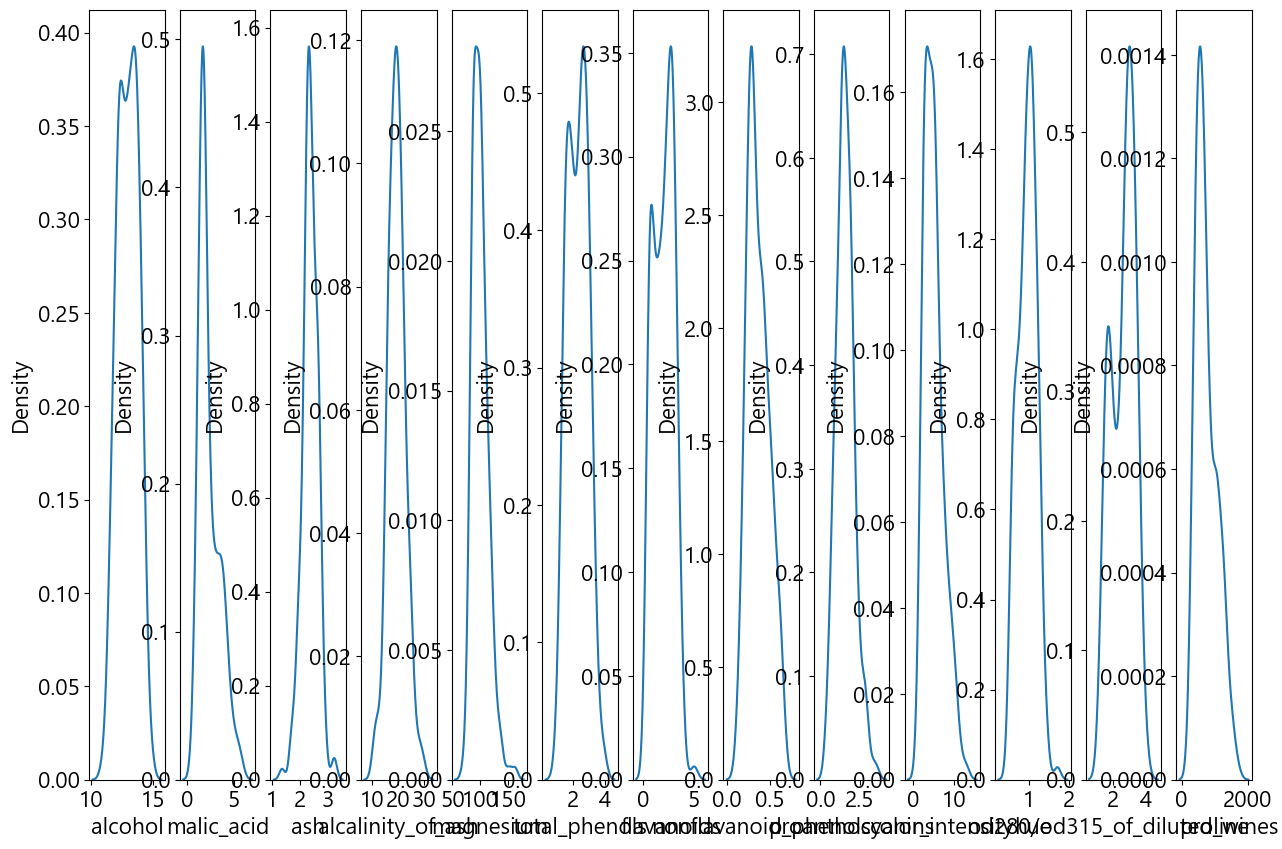

In [55]:
fig,ax = plt.subplots(1,len(df.columns)-1,figsize=(15,10))
for i,col in enumerate(df.iloc[:,:-1].columns):
    sns.kdeplot(data=df,x=col,ax=ax[i])

In [56]:

df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'kind'],
      dtype='object')

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

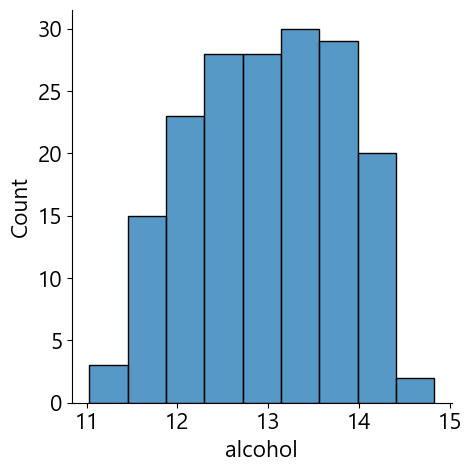

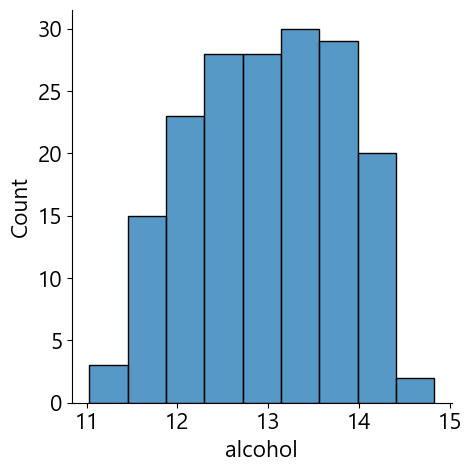

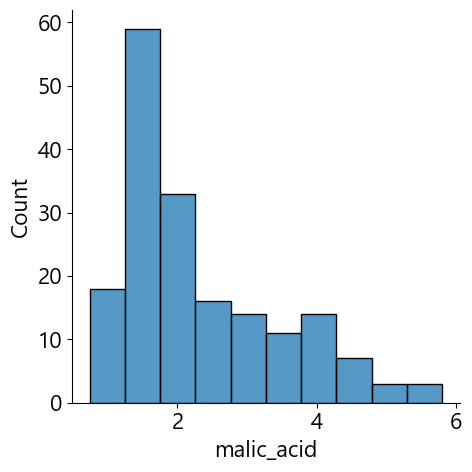

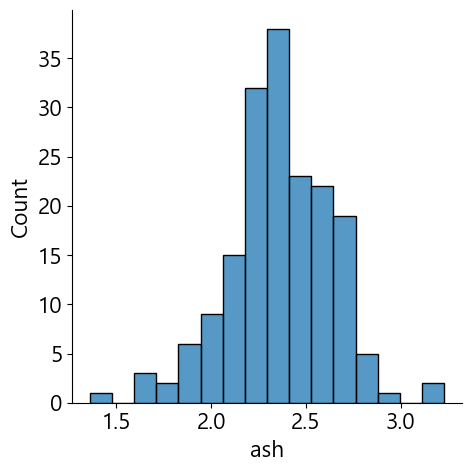

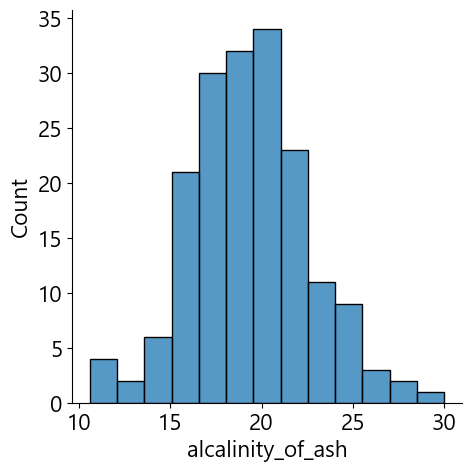

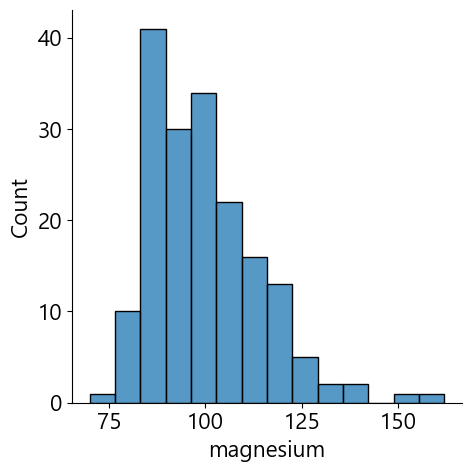

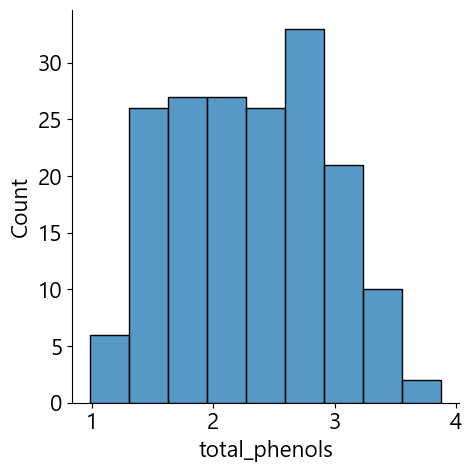

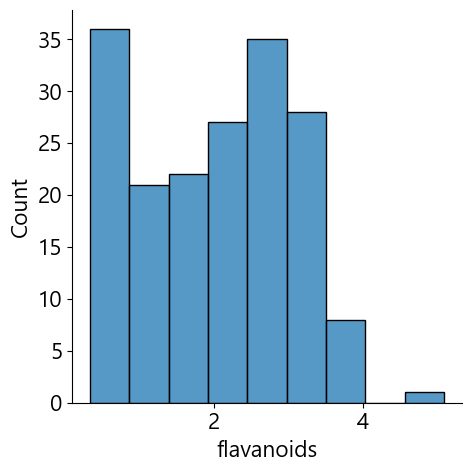

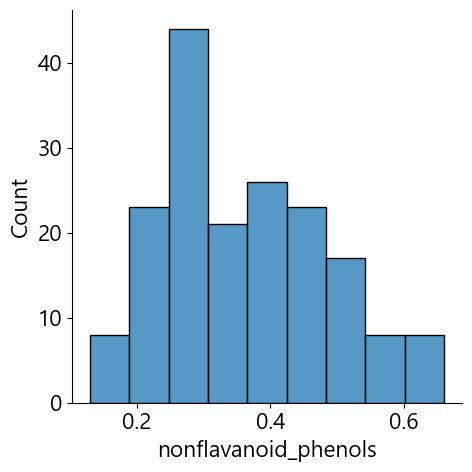

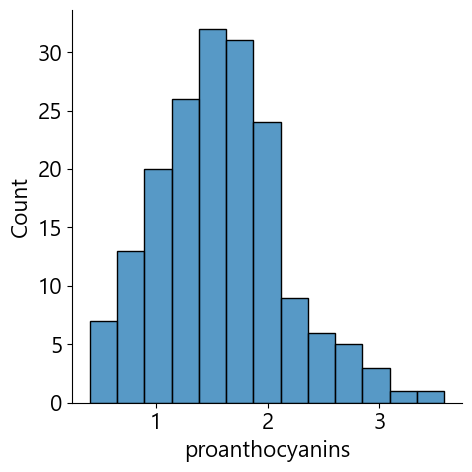

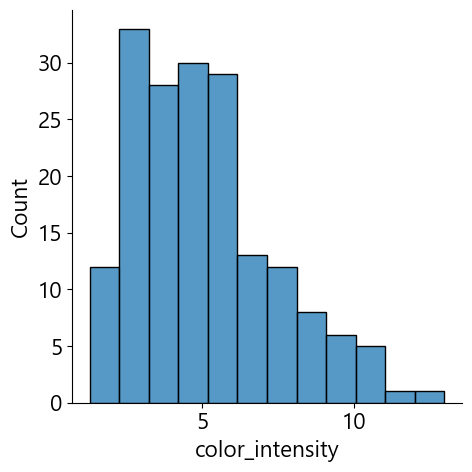

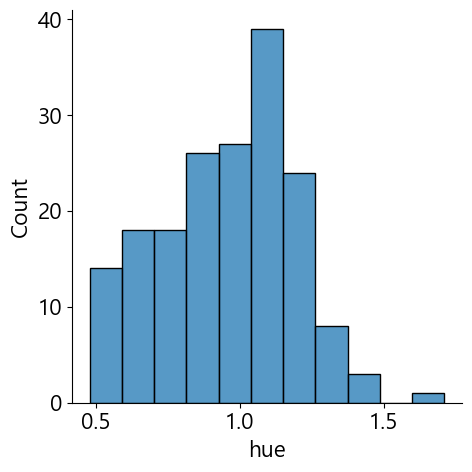

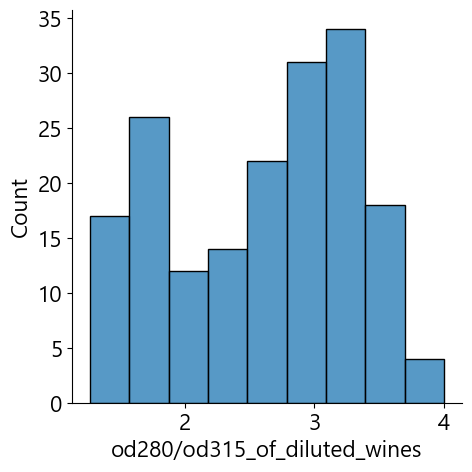

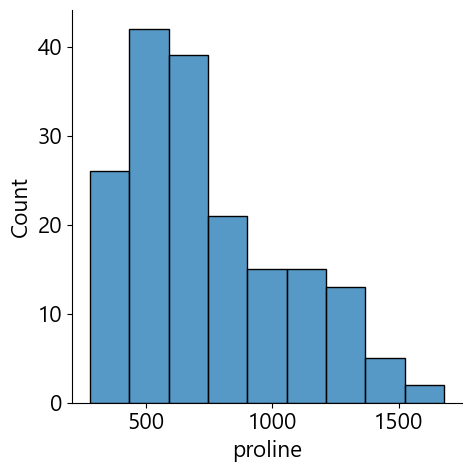

In [57]:
sns.displot(x='alcohol',kind='hist',data=df)
for i , col in enumerate(df.iloc[:,:-1].columns):
    sns.displot(x=col,data=df,kind='hist')

표준화 필요

와인종류별 각 독립변수 값의 분포 확인

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

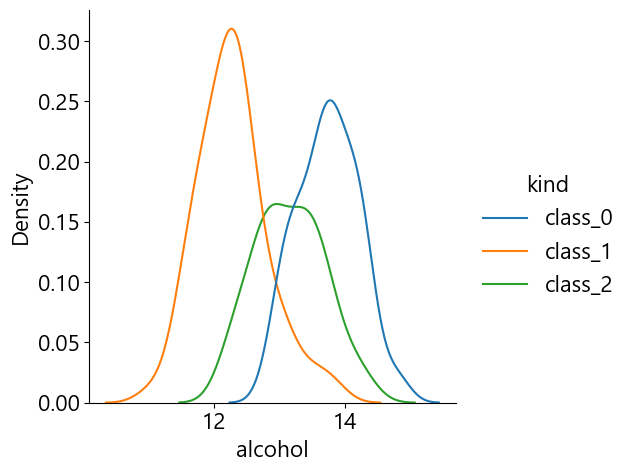

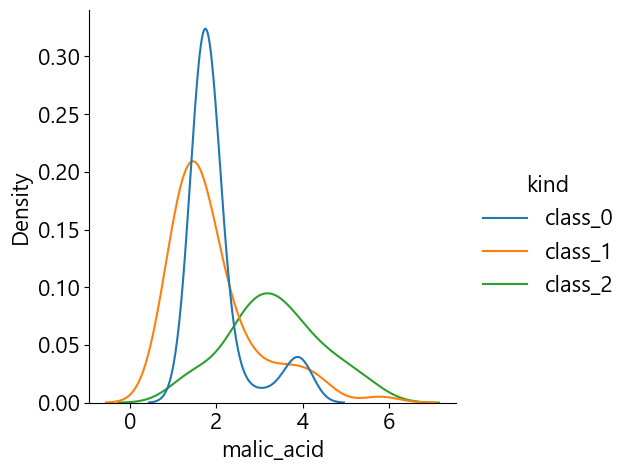

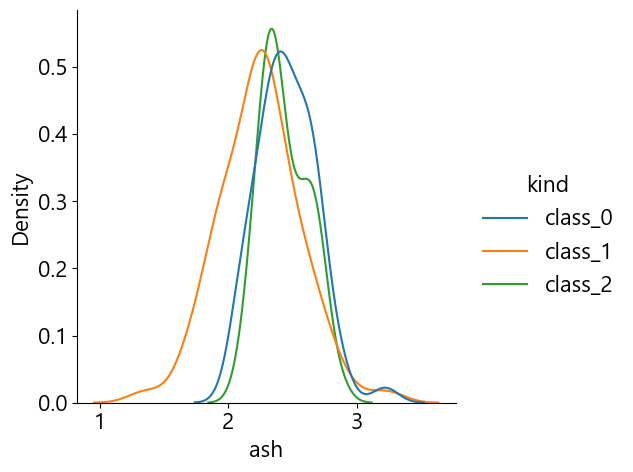

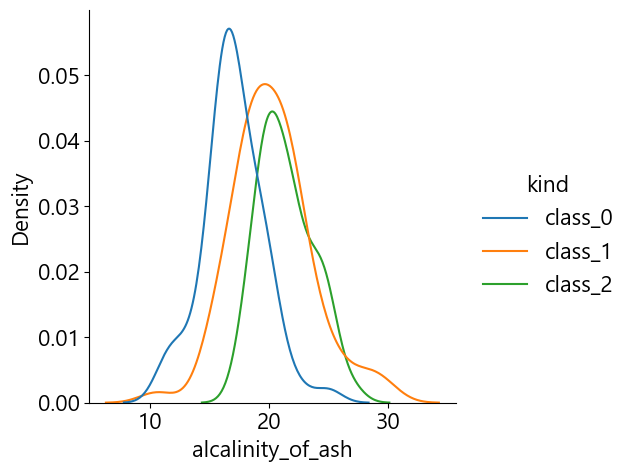

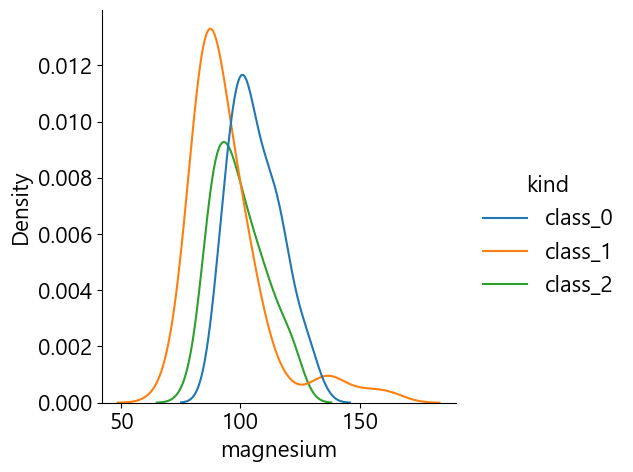

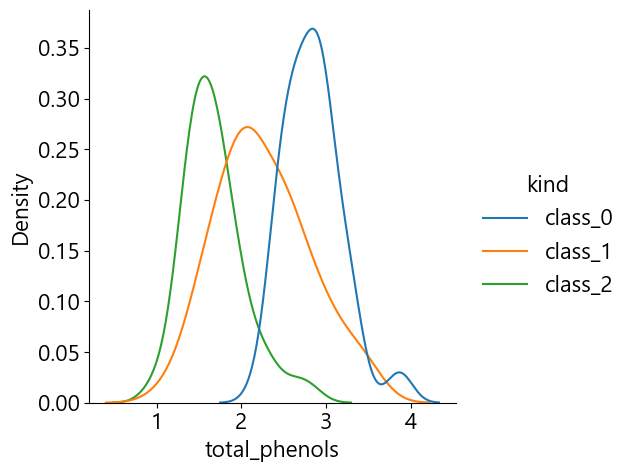

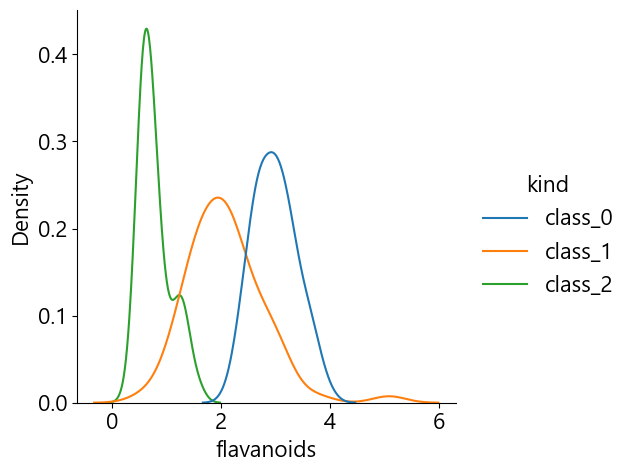

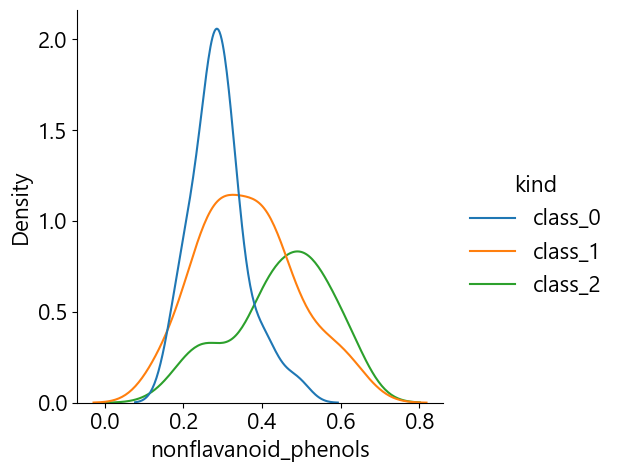

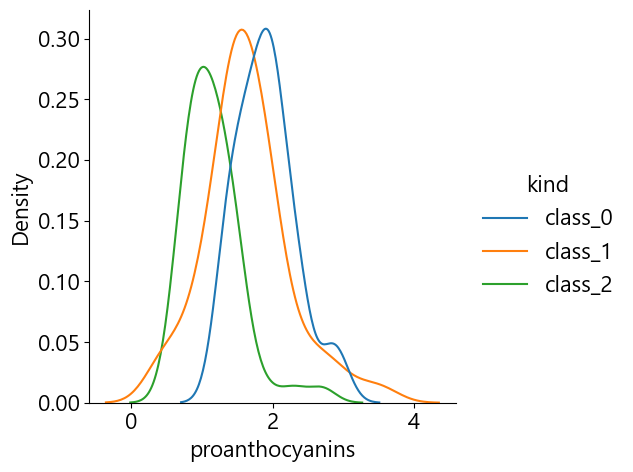

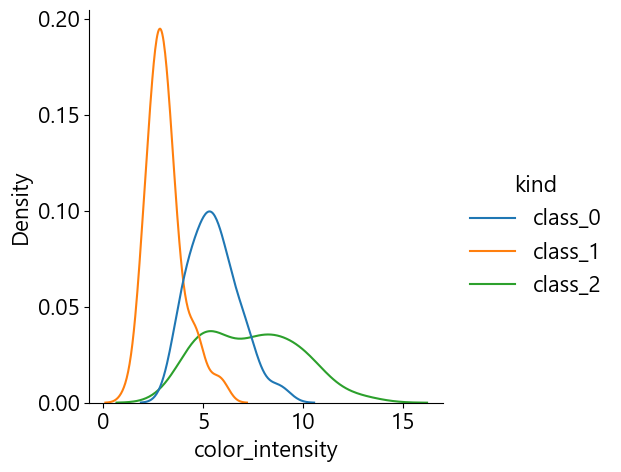

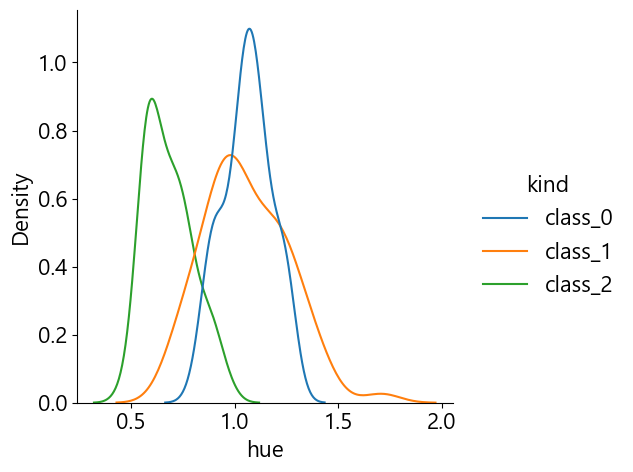

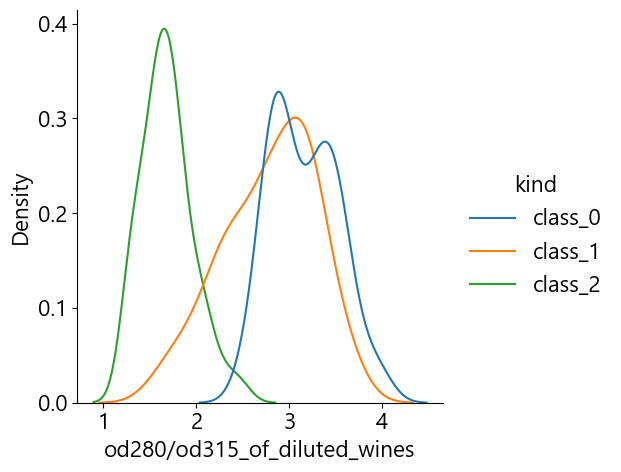

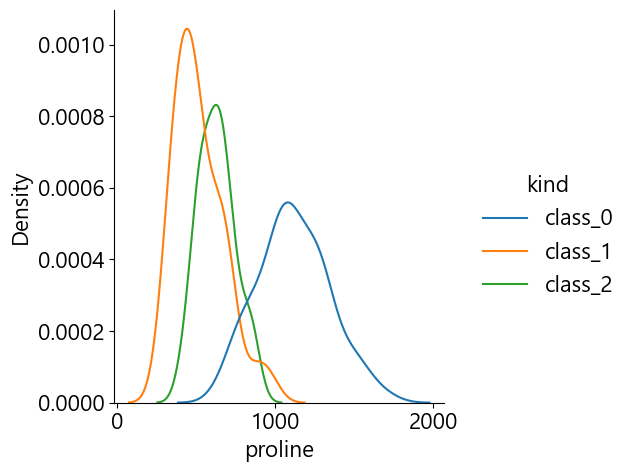

In [58]:
for i, col in enumerate(df.iloc[:,:-1].columns):
    sns.displot(x=col,kind='kde',hue='kind',data=df)

plt.show()
plt.close()

ash 칼럼을 제외한 모든 칼럼이 데이터 분포의 차이가 있어보인다 .  --> 제거 

In [59]:
df = df.drop('ash',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   alcalinity_of_ash             178 non-null    float64
 3   magnesium                     178 non-null    int64  
 4   total_phenols                 178 non-null    float64
 5   flavanoids                    178 non-null    float64
 6   nonflavanoid_phenols          178 non-null    float64
 7   proanthocyanins               178 non-null    float64
 8   color_intensity               178 non-null    float64
 9   hue                           178 non-null    float64
 10  od280/od315_of_diluted_wines  178 non-null    float64
 11  proline                       178 non-null    int64  
 12  kind                          178 non-null    object 
dtypes: fl

In [60]:
# sns.pairplot(df,hue='kind',size=2.5,diag_kind='kde')

#### 이상치 제거 

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   alcalinity_of_ash             178 non-null    float64
 3   magnesium                     178 non-null    int64  
 4   total_phenols                 178 non-null    float64
 5   flavanoids                    178 non-null    float64
 6   nonflavanoid_phenols          178 non-null    float64
 7   proanthocyanins               178 non-null    float64
 8   color_intensity               178 non-null    float64
 9   hue                           178 non-null    float64
 10  od280/od315_of_diluted_wines  178 non-null    float64
 11  proline                       178 non-null    int64  
 12  kind                          178 non-null    object 
dtypes: fl

In [62]:
x_col = df.iloc[:,:-1].columns


In [63]:
clean_df = df.copy()
for col in x_col :
    col_data = clean_df[col]
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3-Q1
    low_outlier = Q1 - 1.5 * IQR
    high_outlier = Q3 + 1.5 * IQR
    print(len(clean_df))
    clean_df = clean_df[(clean_df[col]>=low_outlier) & (clean_df[col]<=high_outlier)]
clean_df.info()

178
178
175
171
168
168
168
168
166
162
161
161
<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       161 non-null    float64
 1   malic_acid                    161 non-null    float64
 2   alcalinity_of_ash             161 non-null    float64
 3   magnesium                     161 non-null    int64  
 4   total_phenols                 161 non-null    float64
 5   flavanoids                    161 non-null    float64
 6   nonflavanoid_phenols          161 non-null    float64
 7   proanthocyanins               161 non-null    float64
 8   color_intensity               161 non-null    float64
 9   hue                           161 non-null    float64
 10  od280/od315_of_diluted_wines  161 non-null    float64
 11  proline                       161 non-null    int64  
 12  kind                 

In [64]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       161 non-null    float64
 1   malic_acid                    161 non-null    float64
 2   alcalinity_of_ash             161 non-null    float64
 3   magnesium                     161 non-null    int64  
 4   total_phenols                 161 non-null    float64
 5   flavanoids                    161 non-null    float64
 6   nonflavanoid_phenols          161 non-null    float64
 7   proanthocyanins               161 non-null    float64
 8   color_intensity               161 non-null    float64
 9   hue                           161 non-null    float64
 10  od280/od315_of_diluted_wines  161 non-null    float64
 11  proline                       161 non-null    int64  
 12  kind                          161 non-null    object 
dtypes: float64

In [65]:
x = clean_df.drop('kind',axis=1)
y = clean_df[['kind']]


In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.519627,-0.572403,-1.244110,2.268984,0.820859,1.047558,-0.651618,1.458627,0.308939,0.374861,1.822789,0.979460
1,0.212981,-0.505394,-2.718396,0.106460,0.581210,0.740108,-0.816055,-0.509896,-0.289756,0.420952,1.087986,0.932119
2,0.162237,0.049826,-0.238916,0.186553,0.820859,1.232028,-0.487182,2.472125,0.327945,0.328769,0.762977,1.358189
3,1.697229,-0.342657,-0.842033,1.147675,2.498399,1.488236,-0.980491,1.244234,1.335273,-0.454791,1.158640,2.289230
4,0.263725,0.269999,0.565240,1.548143,0.820859,0.668370,0.252783,0.542582,-0.318265,0.374861,0.423837,-0.062043


### 사이킷런

In [67]:
y['kind'] = y['kind'].astype('category')

C:\Users\Hamin\AppData\Local\Temp\ipykernel_15564\3272618787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['kind'] = y['kind'].astype('category')


In [68]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 177
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   kind    161 non-null    category
dtypes: category(1)
memory usage: 1.5 KB


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=13)


In [70]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()

lrc.fit(x_train,y_train)
# 예측
y_lrc_pred = lrc.predict(x_test)
print("예측값:", y_lrc_pred[:5])
lrc_acc = accuracy_score(y_test, y_lrc_pred)
print("정확도:%4f" % lrc_acc)



예측값: ['class_0' 'class_0' 'class_2' 'class_2' 'class_1']
정확도:0.979592


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train,y_train)
# 예측
y_dtc_pred = dtc.predict(x_test)
print("예측값:", y_dtc_pred[:5])
# 성능평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("정확도:%4f" % dtc_acc)


예측값: ['class_0' 'class_0' 'class_2' 'class_2' 'class_1']
정확도:0.938776


In [72]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [73]:
y = y.astype('object')


In [74]:
y.loc[y['kind']=="class_0",'kind'] = 0
y.loc[y['kind']=="class_1",'kind'] = 1
y.loc[y['kind']=="class_2",'kind'] = 2

In [75]:
y_cat = to_categorical(y)

In [76]:
# y_train.loc[y_train['kind']=="class_0",'kind'] = 0
# y_train.loc[y_train['kind']=="class_1",'kind'] = 1
# y_train.loc[y_train['kind']=="class_2",'kind'] = 2

# y_test.loc[y_test['kind']=="class_0",'kind'] = 0
# y_test.loc[y_test['kind']=="class_1",'kind'] = 1
# y_test.loc[y_test['kind']=="class_2",'kind'] = 2



In [77]:
x_train,x_test,y_train,y_test =train_test_split(x,y_cat,test_size=0.3,random_state=123)

#### 모델개발

In [78]:
len(x_col)

12

In [83]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(12, )))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                832       
                                                                 
 dense_13 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1027 (4.01 KB)
Trainable params: 1027 (4.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
result = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),callbacks=[
                   EarlyStopping(monitor='val_loss',patience=5,verbose = 1),
                   ReduceLROnPlateau(monitor='val_loss',patience=3,facotr=0.5,min_lr=0.0001,verbose=1)
                   ])

Epoch 1/500


4/4 [==============================] - 1s 134ms/step - loss: 1.5198 - acc: 0.1339 - val_loss: 1.3097 - val_acc: 0.2041 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 1.3852 - acc: 0.1964 - val_loss: 1.2003 - val_acc: 0.2653 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 9ms/step - loss: 1.2610 - acc: 0.2679 - val_loss: 1.1013 - val_acc: 0.3265 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 1.1464 - acc: 0.3750 - val_loss: 1.0113 - val_acc: 0.5102 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 1.0412 - acc: 0.5179 - val_loss: 0.9300 - val_acc: 0.6531 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 0.9477 - acc: 0.6161 - val_loss: 0.8560 - val_acc: 0.7143 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 0.8616 - acc: 0.7232 - val_loss: 0.7890 - val_acc: 0.7755 - lr: 0.0010
Epoch 8/500
4/4

In [85]:
result_df = pd.DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs',inplace=True)
result_df

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,1.519836,0.133929,1.309714,0.204082,0.0010
2,1.385192,0.196429,1.200315,0.265306,0.0010
3,1.260980,0.267857,1.101325,0.326531,0.0010
4,1.146372,0.375000,1.011340,0.510204,0.0010
5,1.041188,0.517857,0.930037,0.653061,0.0010
...,...,...,...,...,...
203,0.013211,1.000000,0.092983,0.938776,0.0001
204,0.013185,1.000000,0.093043,0.938776,0.0001
205,0.013160,1.000000,0.093108,0.938776,0.0001


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

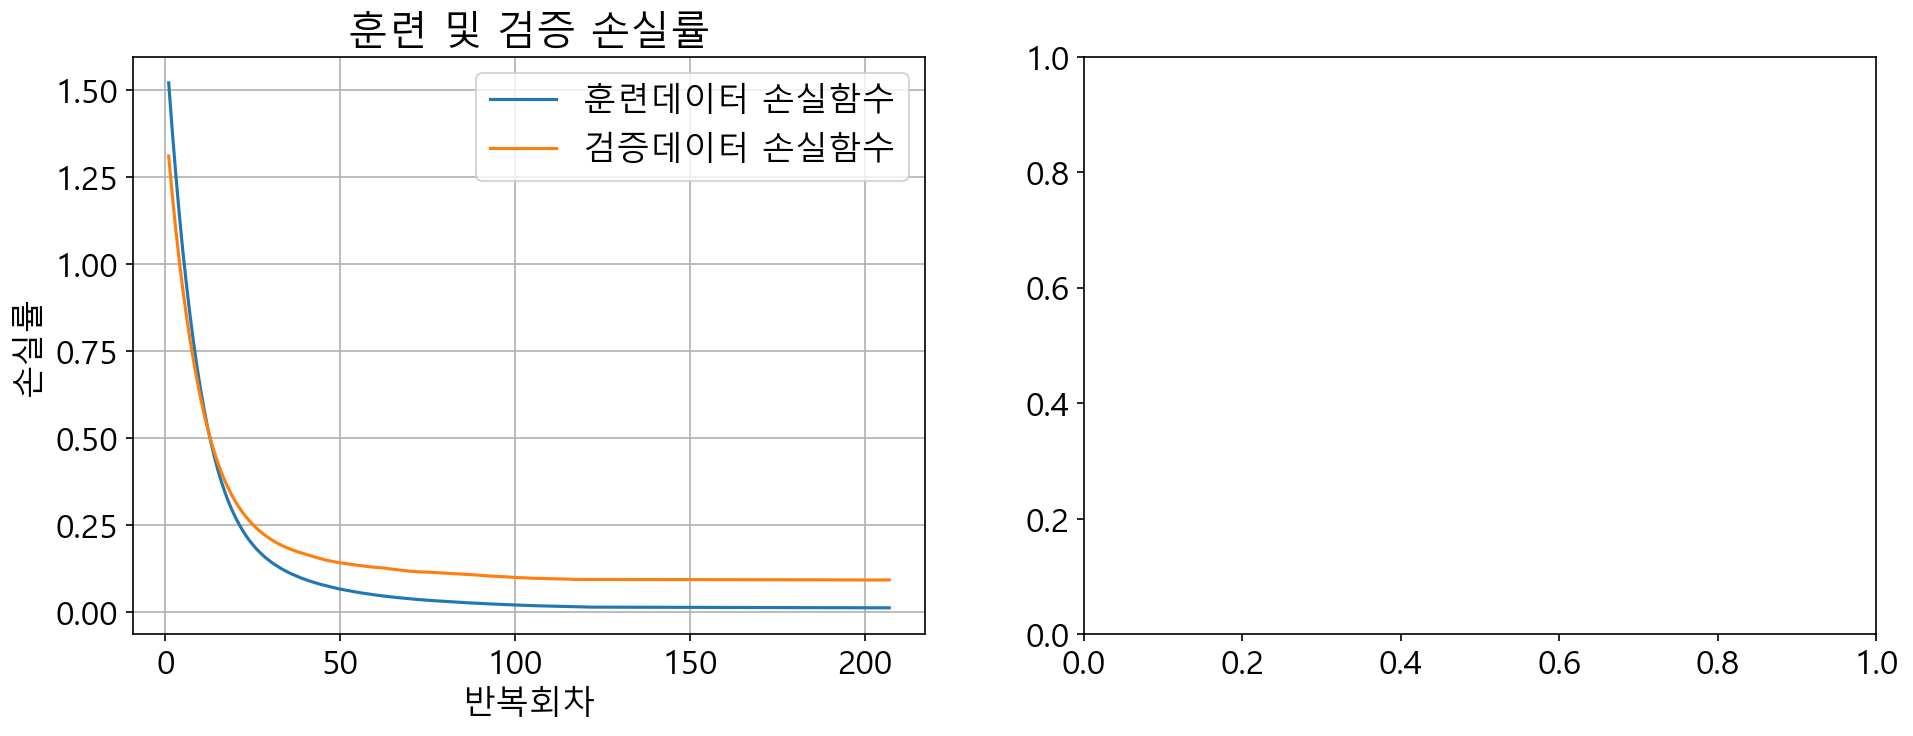

In [88]:
fig, ax = plt.subplots(1,2,figsize=(15,5),dpi = 150)

# 1) 훈련 및 검증데이터 손실함수 시각화
sns.lineplot(x=result_df.index, y='loss',data=result_df,label='훈련데이터 손실함수',ax=ax[0])
sns.lineplot(x=result_df.index,y='val_loss',data=result_df,label='검증데이터 손실함수',ax=ax[0])
ax[0].set_title('훈련 및 검증 손실률')
ax[0].set_xlabel('반복회차')
ax[0].set_ylabel('손실률')
ax[0].grid()
ax[0].legend()

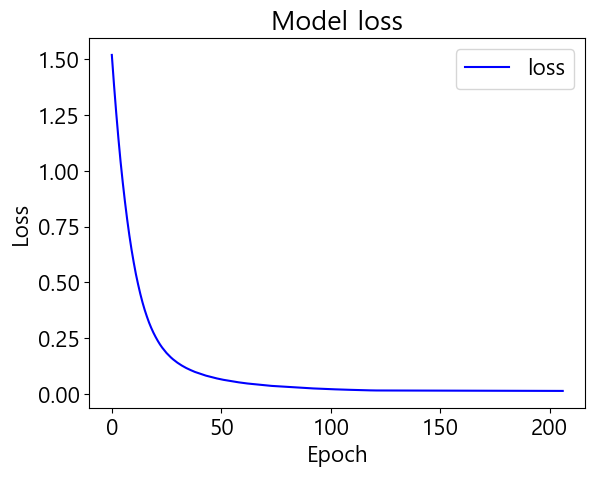

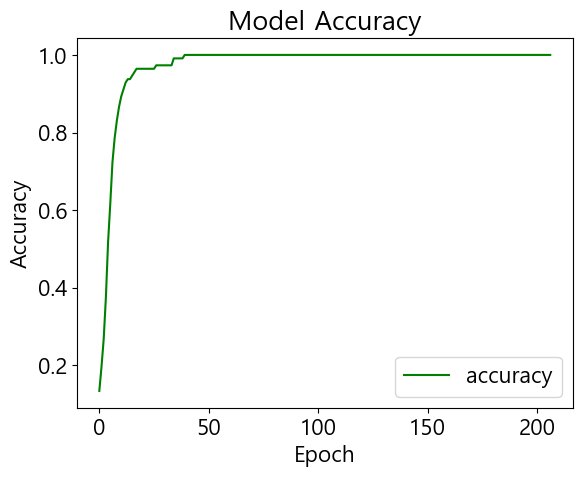

In [92]:
### 모델 손실함수 시각화
plt.plot(result.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 모델 정확도 시각화

plt.plot(result.history['acc'],'g-', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()